# <span style="color:rgb(160,0,86)">Zusammenhangsanalyse</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie können Zusammenhang in ordinalen und metrischen Daten analysieren.
- Sie kennen die **Kovarianz**, den **Korrelationskoeffizienten** und den **Rangkorrelationskoeffizienten**.  
- Sie können Zusammenhänge mit Python grafisch darstellen.  

***

# <span style="color:rgb(160,0,86)">Zusammenhangsanalyse</span>

***

### <span style="color:rgb(160,0,86)">Wie können wir zwei Merkmale graphisch vergleichen?</span>

Wenn wir zwei nominale Merkmale $A$ und $B$ vergleichen, können wir in der Kontingenztafel

$$\begin{array}{c|cccc|c}
    & b_1 & b_2 & b_3 & \cdots & \\ \hline 
a_1 & n(a_1,b_1) & n(a_1,b_2) & n(a_1,b_3) & \cdots & n(a_1)\\
a_2 & n(a_2,b_1) & n(a_2,b_2) & n(a_2,b_3) & \cdots & n(a_2)\\
a_3 & n(a_3,b_1) & n(a_3,b_2) & n(a_3,b_3) & \cdots & n(a_3)\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\ \hline
    & n(b_1) & n(b_2) & n(b_3) & \cdots & n
\end{array}$$

- für jeden Werte $b_1, b_2, b_3, \ldots$ die Verteilungen des Merkmals $\pmb{A}$  $$\frac{n(a_i,b_1)}{n(b_1)}, \frac{n(a_i,b_2)}{n(b_2)}, \frac{n(a_i,b_3)}{n(b_3)}, \ldots\;\,\text{ für alle Werte } a_i$$
- und für jeden Werte $a_1, a_2, a_3, \ldots$ die Verteilungen des Merkmals $\pmb{B}$  $$\frac{n(a_1,b_j)}{n(a_1)}, \frac{n(a_2,b_j)}{n(a_2)}, \frac{n(a_3,b_j)}{n(a_3)},\ldots\;\,\text{ für alle Werte } b_j$$

in einem **Stabdiagramm** abbilden. Zum Beilspiel für die zwei Kontingenztafeln

$$\begin{array}{c|ccccc|c}
    & b_1 & b_2 & b_3 & b_4 & b_5 &\\ \hline 
a_1 & 18 & 5 & 30 &  9 & 4 & 66\\
a_2 & 22 & 5 & 20 & 11 & 1& 59\\ \hline
    & 40 & 10 & 50 & 20 & 5 & 125
\end{array}\quad\text{ und }\quad
\begin{array}{c|ccccc|c}
    & b_1 & b_2 & b_3 & b_4 & b_5 &\\ \hline 
a_1 & 16 & 4 & 20 &  8 & 2 & 50\\
a_2 & 24 & 6 & 30 & 12 & 3 & 75\\ \hline
    & 40 & 10 & 50 & 20 & 5 & 125
\end{array}$$

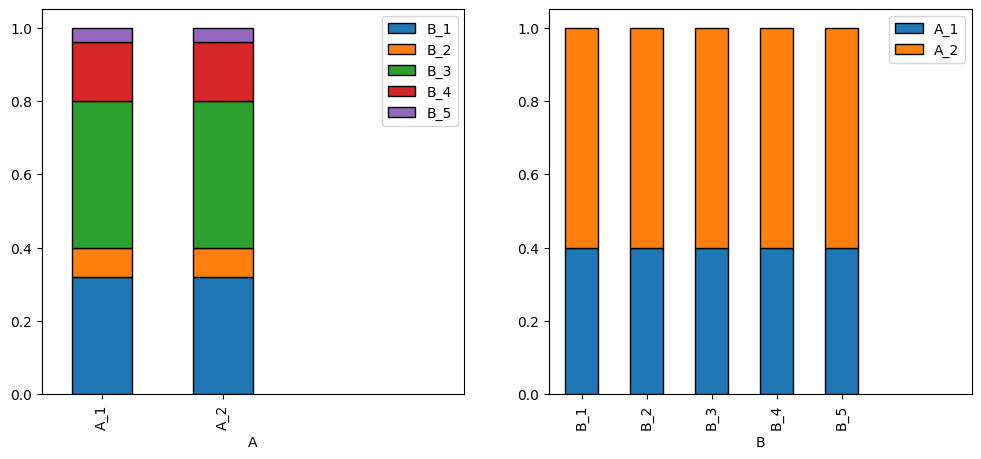

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.array([[16, 4, 20,  8, 2],
                 [24, 6, 30, 12, 3]])
#data = np.array([[18, 5, 30,  9, 4],
#                 [22, 5, 20, 11, 1]])
dataA = data.T / data.T.sum(axis=0)
df1 = pd.DataFrame(dataA.T)
names = {0:"B_1",1:"B_2",2:"B_3",3:"B_4",4:"B_5"}
df1.rename(columns=names,inplace=True)
df1["A"] = ["A_1","A_2"]
df1.set_index("A",inplace=True)

dataB = data / data.sum(axis=0)
df2 = pd.DataFrame(dataB.T)
names = {0:"A_1",1:"A_2"}
df2.rename(columns=names,inplace=True)
df2["B"] = ["B_1","B_2","B_3","B_4","B_5"]
df2.set_index("B",inplace=True)

fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(1,2,1)
df1.plot.bar(stacked=True,ax = ax1, width = 0.5,edgecolor="black")
ax1.set_xlim(-0.5,3)

ax2 = fig.add_subplot(1,2,2)
df2.plot.bar(stacked=True,ax = ax2, width = 0.5,edgecolor="black")
ax2.set_xlim(-0.5,6)

plt.show()

<span style="color:rgb(160,0,86)">***Wenn sich die Verteilungen nicht unterschieden, sind die zwei Merkmale unabhängig!***</span> 

Zwei **metrische Merkmale** 
$$A = a_1,\, a_2,\, a_3,\, a_4,\,\ldots \;\,\text{ und } \quad B = b_1,\, b_2,\, b_3,\, b_4,\,\ldots $$
können wir **in einem Koordinatensystem** abbilden, indem wir für jede statistische Einheit einen Punkt $$P_1 = (a_1,b_1),\, P_2 = (a_2,b_2),\, P_3 = (a_3,b_3),\, P_4 = (a_4,b_4),\,\ldots$$ mit den Werten des Markmals $A$ als $x$-Koordinate und den Werten des Merkmals $B$ als $y$-Koordinate eintragen. So eine Abbildung heisst **Streudiagramm** oder **Scatterplot**.  

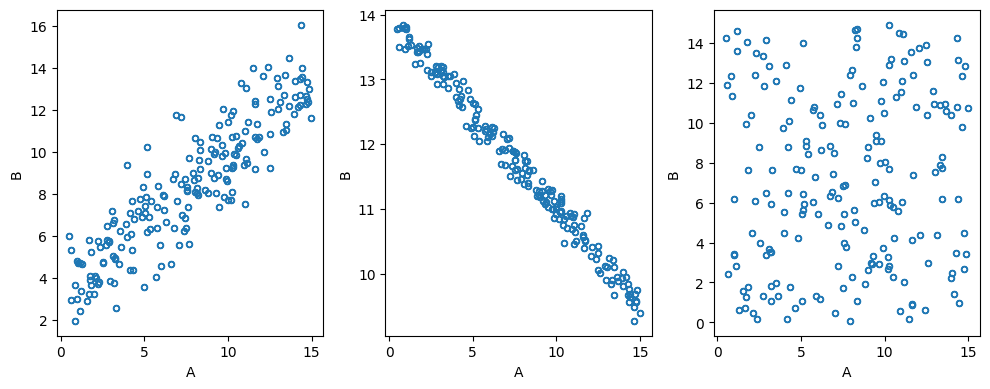

In [10]:
A = np.random.uniform(low=0,high=15,size=200)
B_p = 0.7*A + 3 + np.random.normal(0,1.5,200) # kleinerer Zusammenhang
B_n = -0.3*A + 14 + np.random.normal(0,0.15,200)# grosser Zusammenhang
B = np.random.uniform(low=0,high=15,size=200) # kein Zusammenhang

df_p = pd.DataFrame({"A":A,"B":B_p})
df_n = pd.DataFrame({"A":A,"B":B_n})
df = pd.DataFrame({"A":A,"B":B})

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,3,1)
df_p.plot.scatter(x = "A", y = "B", ax = ax1,marker="$\u25EF$")
ax1.set_xlabel("A")
ax1.set_ylabel("B")

ax2 = fig.add_subplot(1,3,2)
df_n.plot.scatter(x = "A", y = "B", ax = ax2, marker="$\u25EF$")
ax2.set_xlabel("A")
ax2.set_ylabel("B")

ax3 = fig.add_subplot(1,3,3)
df.plot.scatter(x = "A", y = "B", ax = ax3, marker="$\u25EF$")
ax3.set_xlabel("A")
ax3.set_ylabel("B")

plt.tight_layout()
plt.show()

Der Zusammenhang zwischen zwei ordinalen oder metrischen Merkmalen wird mit unterschiedlichen **Korrelationsmassen** beurteilt. Dabei wird  die **Intensität** als auch die **Richtung** des Zusammenhangs gemessen. 

Wir können **positive** und **negative Korrelation** unterscheiden.
- **Positive Korrelation** liegt vor, wenn tendentiell gilt: $$\textbf{je grösser } \,\pmb{a_i}\,\textbf{ ist, desto grösser ist auch } \,\pmb{b_i}$$
- **Negative Korrelation** liegt vor, wenn tendentiell gilt: $$\textbf{je grösser } \,\pmb{a_i}\,\textbf{ ist, desto kleiner ist } \,\pmb{b_i}$$

In einem **Streudiagramm** wird so eine Tendenz ersichtlich. Allerdings können sich in sehr grossen Datensätzen Punkte stark überlagern, so dass wir einen Zusammenhang nicht mehr erkennen: 

In [11]:
kc_tax = pd.read_csv("Daten/kc_tax.csv.gz")
kc_tax.shape

(498249, 3)

In [12]:
# Anzahl fertiggestellter Wohnfläche in Quadratfuss
# steuerlich geschätztem Wert
kc_tax.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [14]:
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), : ]
kc_tax0.shape

(432693, 3)

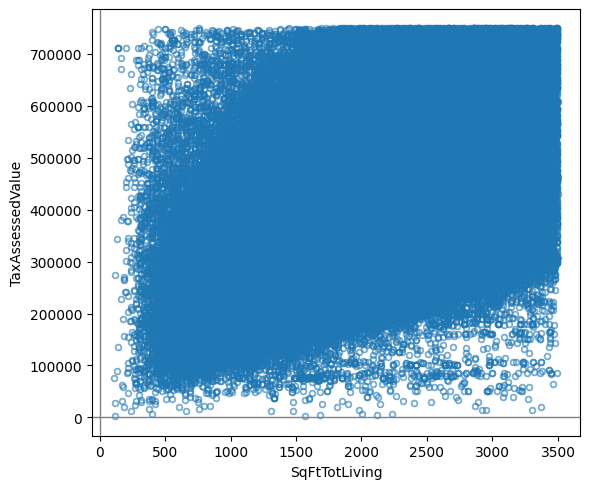

In [16]:
ax = kc_tax0.plot.scatter(x="SqFtTotLiving",
                          y="TaxAssessedValue",
                          figsize=(6,5),marker="$\u25EF$",alpha=0.5)
ax.set_xlabel("SqFtTotLiving")
ax.set_ylabel("TaxAssessedValue")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)

plt.tight_layout()
plt.show()

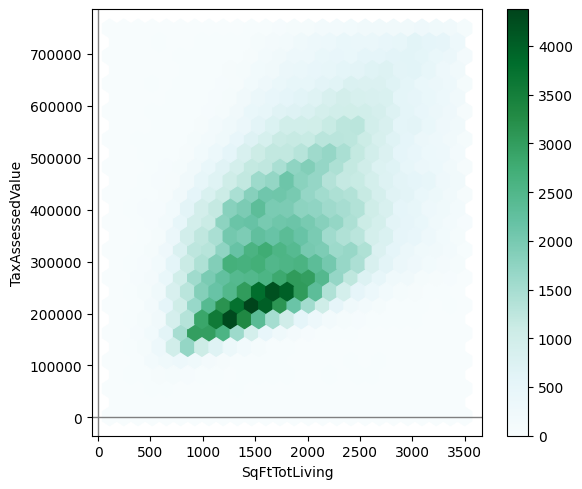

In [17]:
ax = kc_tax0.plot.hexbin(x="SqFtTotLiving",
                         y="TaxAssessedValue",
                         figsize=(6,5),gridsize=25,sharex=False)
ax.set_xlabel("SqFtTotLiving")
ax.set_ylabel("TaxAssessedValue")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)

plt.tight_layout()
plt.show()

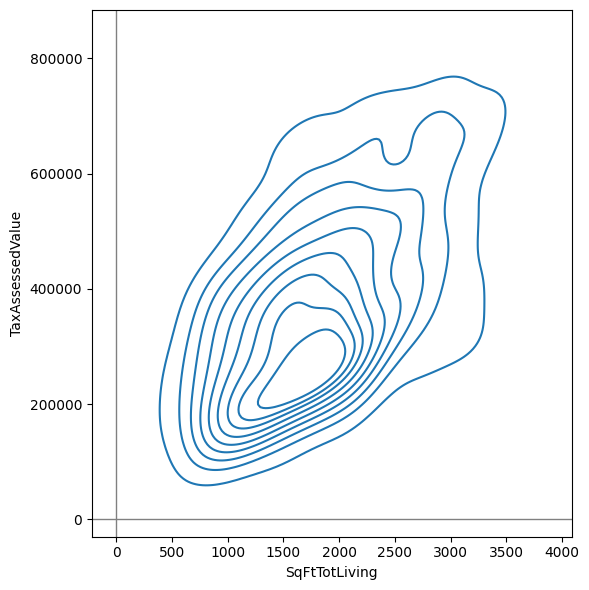

In [18]:
import seaborn as sns

fig , ax = plt.subplots(figsize=(6,6))
sns.kdeplot(data=kc_tax0.sample(1000),x="SqFtTotLiving",
                         y="TaxAssessedValue",ax=ax)
ax.set_xlabel("SqFtTotLiving")
ax.set_ylabel("TaxAssessedValue")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)

plt.tight_layout()
plt.show()

### <span style="color:rgb(160,0,86)">Was bedeutet Kausalität?</span>

Wenn wir in Daten eine statistische Beziehung zwischen zwei Merkmalen feststellen, heisst das noch nicht, dass in der Tat ein **kausaler Zusammenhang** besteht. 
- **Kausalität** ist ein **Ursache-Wirkungs-Zusammenhang** (Feuer verursacht Wärme)
- **Korrelation** ist ein **statistischer Zusammenhang** (Eisverkauf und Sonnenbrand steigen gemeinsam im Sommer) 



Im folgenden *Datensatz* ist der **durchschnittlicher Weinkonsum** (in Liter pro Person und Jahr) und die **Mortalität** (Anzahl Todesfälle pro 1000 Perso- nen zwischen 55 und 64 Jahren pro Jahr) aufgrund von Herz- und Kreislauferkrankungen in 18 Ländern erfasst:
$$\begin{array}{l|cc}
\text{Land} & \text{Weinkonsum} & \text{Mortalität Herzerkrankung} \\ \hline
\text{Norwegen} & 2.8 & 6.2 \\
\text{Schottland} & 3.2 & 9.0 \\
\text{Grossbritannien} & 3.2 & 7.1 \\
\text{Irland} & 3.4 & 6.8 \\
\text{Finnland} & 4.3 & 10.2 \\
\text{Kanada} & 4.9 & 7.8 \\
\text{Vereinigte Staaten} & 5.1 & 9.3 \\
\text{Niederlande} & 5.2 & 5.9 \\
\text{New Zealand} & 5.9 & 8.9 \\
\text{Dänemark} & 5.9 & 5.5 \\
\text{Schweden} & 6.6 & 7.1 \\
\text{Australien} & 8.3 & 9.1 \\
\text{Belgien} & 12.6 & 5.1 \\
\text{Deutschland} & 15.1 & 4.7 \\
\text{Österreich} & 25.1 & 4.7 \\
\text{Schweiz} & 33.1 & 3.1 \\
\text{Italien} & 75.9 & 3.2 \\
\text{Frankreich} & 75.9 & 2.1
\end{array}$$

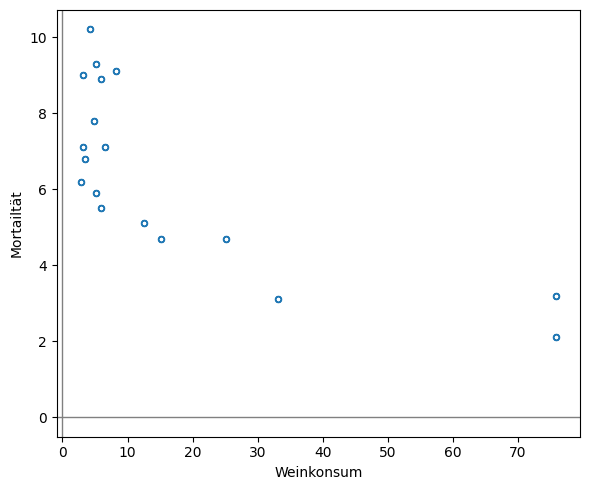

In [19]:
Weinkonsum = np.array([2.8,3.2,3.2,3.4,4.3,4.9,5.1,5.2,5.9,5.9,6.6,8.3,12.6,15.1,25.1,33.1,75.9,75.9])
Mortalität = np.array([6.2,9.0,7.1,6.8,10.2,7.8,9.3,5.9,8.9,5.5,7.1,9.1,5.1,4.7,4.7,3.1,3.2,2.1])

df = pd.DataFrame({"Weinkonsum":Weinkonsum,"Mortalität":Mortalität})
ax = df.plot.scatter(x="Weinkonsum",
                     y="Mortalität",
                     figsize=(6,5),marker="$\u25EF$")#,alpha=0.5)
ax.set_xlabel("Weinkonsum")
ax.set_ylabel("Mortailtät")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)

plt.tight_layout()
plt.show()

**Geysir Old Faithful** (Yellowstone National Park) ist eine bekannte heisse Quelle. Für Zuschauer und Nationalparkdienst ist die Zeitspanne zwischen
zwei Ausbrüchen und die Eruptionsdauer von grossem Interesse.

Von 1.8.1978 - 8.8.1978 wurden insgesamt 107 Messungen von
**aufeinanderfolgenden Ausbrüchen** gemacht:

In [20]:
geysir = pd.read_csv("Daten/geysir.dat",delimiter=" ")
geysir.head()

,Tag,Zeitspanne,Eruptionsdauer
1,1,78,4.4
2,1,74,3.9
3,1,68,4.0
4,1,76,4.0
5,1,80,3.5


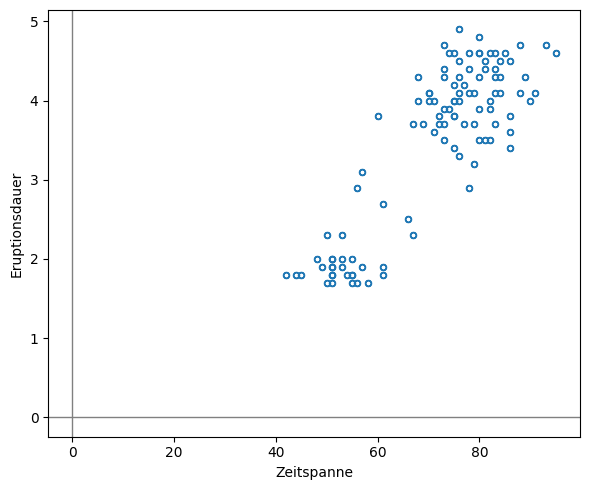

In [21]:
ax = geysir.plot.scatter(x="Zeitspanne",
                     y="Eruptionsdauer",
                     figsize=(6,5),marker="$\u25EF$")#,alpha=0.5)
ax.set_xlabel("Zeitspanne")
ax.set_ylabel("Eruptionsdauer")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)

plt.tight_layout()
plt.show()

### <span style="color:rgb(160,0,86)">Was ist der Korrelationskoeffizient?</span>

Die grundlegende Metrik der Korreklationsanalyse für zwei metrische Merkmale  $A$ und $B$ ist die **Kovarianz**:

$$\sigma_{ab}=\frac{1}{n}\big((x_1-\bar{x})\cdot(y_1-\bar{y})+(x_2-\bar{x})\cdot(y_2-\bar{y})+\ldots+(x_n-\bar{x})\cdot(y_n-\bar{y})\big)$$

Im Gegensatz zur Varianz kann die Kovarianz auch negative Werte annehmen. Das **Vorzeichen** gibt Aufschluss über die **Richtung** der Zusammenhangs:
- Wenn die **Kovarianz** $\pmb{\sigma_{ab}}$ **positiv** ist, gibt es eine **positive Korrelation**.
- Wenn die **Kovarianz** $\pmb{\sigma_{ab}}$ **negativ** ist, gibt es eine **negative Korrelation**.
- Wenn die **Kovarianz** $\pmb{\sigma_{ab}}$ **Null** ist, gibt es keine **Korrelation**.

**Bemerkung**: Wenn wird die Kovarianz für das Merkmal A mit sich selbst berechnen
$$\sigma_{aa}=\frac{1}{n}\big((a_1-\bar{a})\cdot(a_1-\bar{a})+(a_2-\bar{a})\cdot(a_2-\bar{a})+\ldots+(a_n-\bar{a})\cdot(a_n-\bar{a})\big)$$
dann entsteht die mittlere quadratische Abweichung (**Varianz**)

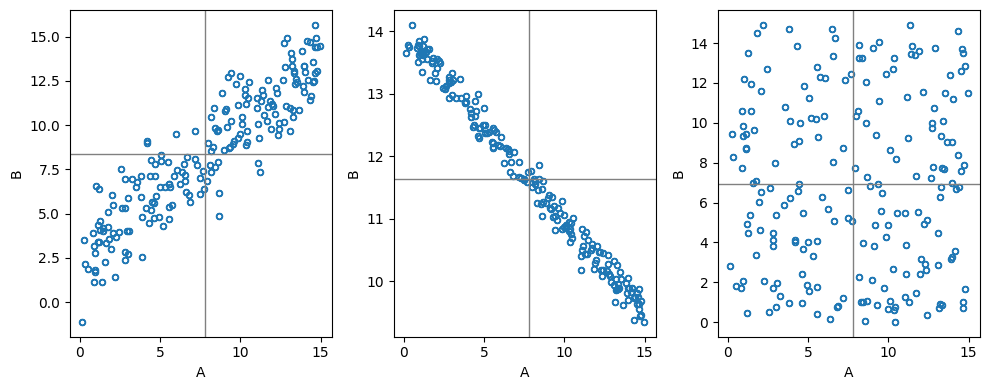

In [23]:
A = np.random.uniform(low=0,high=15,size=200)
B_p = 0.7*A + 3 + np.random.normal(0,1.5,200) 
B_n = -0.3*A + 14 + np.random.normal(0,0.15,200)
B = np.random.uniform(low=0,high=15,size=200)

df_p = pd.DataFrame({"A":A,"B":B_p})
df_n = pd.DataFrame({"A":A,"B":B_n})
df = pd.DataFrame({"A":A,"B":B})

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,3,1)
df_p.plot.scatter(x = "A", y = "B", ax = ax1,marker="$\u25EF$")
ax1.set_xlabel("A")
ax1.set_ylabel("B")
ax1.axvline(df_p["A"].mean(), color="grey", lw=1) # Mittel von A
ax1.axhline(df_p["B"].mean(), color="grey", lw=1) # Mittel von B

ax2 = fig.add_subplot(1,3,2)
df_n.plot.scatter(x = "A", y = "B", ax = ax2, marker="$\u25EF$")
ax2.set_xlabel("A")
ax2.set_ylabel("B")
ax2.axvline(df_n["A"].mean(), color="grey", lw=1)# Mittel von A
ax2.axhline(df_n["B"].mean(), color="grey", lw=1)# Mittel von B

ax3 = fig.add_subplot(1,3,3)
df.plot.scatter(x = "A", y = "B", ax = ax3, marker="$\u25EF$")
ax3.set_xlabel("A")
ax3.set_ylabel("B")
ax3.axvline(df["A"].mean(), color="grey", lw=1)# Mittel von A
ax3.axhline(df["B"].mean(), color="grey", lw=1)# Mittel von B

plt.tight_layout()
plt.show()

In [27]:
print("Kovarianzmatrix:")
print(df_p.cov(ddof=0))  # =1 wird bei stichproben gemacht, es wird noch durch 1/n dividiert um ein erwartungstreuer schätzer zu haben
print("\n")
print(df_p["A"].var(ddof=0),df_p["B"].var(ddof=0))

Kovarianzmatrix:
           A          B
A  19.668928  14.523421
B  14.523421  12.944763


19.668928236397768 12.944762563977552


In [28]:
print(df_n.cov(ddof=0))
print(df_n["A"].var(ddof=0),df_n["B"].var(ddof=0))

           A         B
A  19.668928 -5.915584
B  -5.915584  1.804102
19.668928236397768 1.804102148745628


In [29]:
print(df.cov(ddof=0))
print(df["A"].var(ddof=0),df["B"].var(ddof=0))

           A          B
A  19.668928   0.530444
B   0.530444  19.346038
19.668928236397768 19.346037699778496


Der absolute Zahlenwert der **Kovarinaz** $\pmb{\sigma_{ab}}$ können wir wegen der wenig anschaulichen Dimension und der fehlenden Normierung kaum interpretieren. Um eine Aussage über die Intensität der Zusammenhangs machen zu können, muss die Kovarianz mit den Standardabweichungen der beiden Merkmale **normiert werden**. Der **Korrelationskoeffizient nach Bravais/Pearson** ist die mit den Standardabweichungen von $A$ und $B$ normierte Kovarianz:
$$\pmb{r} =\frac{\pmb{\sigma_{ab}}}{\pmb{\sigma_{a}}\cdot\pmb{\sigma_{b}}}$$ 
Diese Normierung bewirkt, dass der Korrelationskoeffizent **dimensionslos** ist und darüber hinaus gilt:
$$\pmb{-1\leqslant r \leqslant 1}$$

In [30]:
print(df_p.corr())

          A         B
A  1.000000  0.910189
B  0.910189  1.000000


In [31]:
print(df_n.corr())

          A         B
A  1.000000 -0.993063
B -0.993063  1.000000


In [57]:
print(df.corr())

          A         B
A  1.000000 -0.028532
B -0.028532  1.000000


***Achtung:*** <span style="color:rgb(160,0,86)">**Merkmale können einen nicht linearen Zusammenhang haben. In so einem Fall ist der Korrelationskoeffizient möglicherweise nicht aussagekräftig!**</span>

**Der Korrelationskoeffizient misst also linearität**

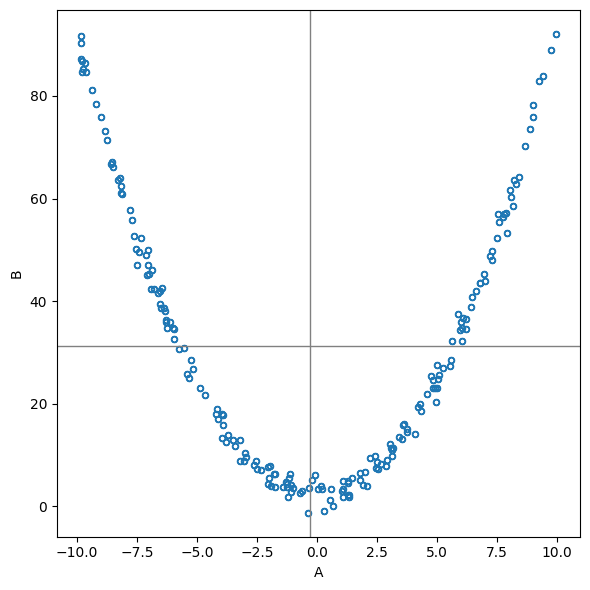

In [32]:
A = np.random.uniform(low=-10,high=10,size=200)
B = 0.9*A**2 + 2 + np.random.normal(0,1.5,200) 

df = pd.DataFrame({"A":A,"B":B})

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
df.plot.scatter(x = "A", y = "B", ax = ax1,marker="$\u25EF$")
ax1.set_xlabel("A")
ax1.set_ylabel("B")
ax1.axvline(df["A"].mean(), color="grey", lw=1)
ax1.axhline(df["B"].mean(), color="grey", lw=1)

plt.tight_layout()
plt.show()

In [33]:
print(df.corr())

          A         B
A  1.000000 -0.126003
B -0.126003  1.000000


Die **Kovarianz** $\pmb{\sigma_{ab}}$ und der darauf basierende **Korrelationskeffizient** $\pmb{r}$ **nach Bravais/Pearson** setzen voraus, dass die Merkmale, deren Zusammenhang untersucht wird, **metrisch** sind. Wir müssen mit den Werten rechnen können!

Ist hingegen **zumindest eines der beiden Merkmale nur ordinal**, so wird stattdessen der **Rangkorreklationskoeffizient nach Spearman** verwendet. In diesem Fall werden den Werten $a_1,a_2,a_3,\ldots,a_n$ und $b_1,b_2,b_3,\ldots,b_n$ sogenannte **Rangzahlen** $$\pmb{R(a_i)} \;\text{ und }\; \pmb{R(b_i)}$$ zugewiessen:
- der kleinste $a_i$- bzw. $b_i$-Wert erhält die **Rangzahl 1**,
- zweitkleinste $a_i$- bzw. $b_i$-Wert erhält die **Rangzahl 2**,
- usw.
- der grösste $a_i$- bzw. $b_i$-Wert erhält die **Rangzahl** $\pmb{n}$.

Wenn mehrere Werte eines Merkmals gleich gross sind (man spricht von **Bindungen**), erhalten diese alle **als Rangzahl das arithmetische Mittel** der betreffenden Rangzahlen. 

Sind zum Beispiel die vier kleinsten Werte identisch, so haben sie alle die Rangzahl $$\frac{1}{4}(1+2+3+4)=2.5\;.$$

Der **Rangkorrelationskoeffizient** erhält man nun einfach, indem man den Korrelationskoeffizienten nach Bravais/Pearson auf die Rangzahlen anwendet: $$\pmb{r_{Sp}=\frac{\sigma_{R(a)R(b)}}{\sigma_{R(a)}\cdot\sigma_{R(b)}}}\;.$$

### <span style="color:rgb(160,0,86)">Beispiel: Börsendaten</span>

Wir machen eine **Zusammenhangsanalyse** für die **Tagesrenditen von Aktien** von Juli 2012 bis Juni 2015 der Telekommunikationsbranche :

In [38]:
import pandas as pd
sp500_sym = pd.read_csv("Daten/sp500_sectors.csv")
sp500_px = pd.read_csv("Daten/sp500_data.csv.gz")

print(sp500_sym.shape,sp500_px.shape)

(517, 4) (5647, 518)


In [39]:
sp500_px.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [40]:
sp500_px.set_index("Unnamed: 0",inplace=True)
sp500_px.index

Index(['1993-01-29', '1993-02-01', '1993-02-02', '1993-02-03', '1993-02-04',
       '1993-02-05', '1993-02-08', '1993-02-09', '1993-02-10', '1993-02-11',
       ...
       '2015-06-18', '2015-06-19', '2015-06-22', '2015-06-23', '2015-06-24',
       '2015-06-25', '2015-06-26', '2015-06-29', '2015-06-30', '2015-07-01'],
      dtype='object', name='Unnamed: 0', length=5647)

In [41]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [42]:
telecomSym = sp500_sym[sp500_sym["sector"] == "telecommunications_services"]["symbol"]
telecomSym

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [43]:
telecom = sp500_px.loc[sp500_px.index >= "2012-07-01"]
telecom.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2012-07-02,1.190002,-0.224999,-0.055103,-0.560002,-0.455000,-0.104774,-0.279545,-0.495967,-0.018692,-0.152205,...,-0.970001,3.830002,1.257135,0.0,2.110001,0.105000,0.219207,5.610000,-0.539997,-0.189994
2012-07-03,0.440002,0.125998,0.486724,0.849998,0.165001,0.219071,0.308464,0.439807,0.093461,0.409055,...,1.090004,-0.510002,1.058641,0.0,0.100006,0.440002,0.274009,1.300003,-0.170002,0.519997
2012-07-05,-0.369995,-0.116998,0.101019,0.459999,0.395001,-0.038100,-0.269906,0.383662,0.186922,-0.475645,...,0.690003,-0.489998,0.255211,0.0,-0.600006,-0.175003,-0.283971,-0.630005,0.000000,0.369995
2012-07-06,0.319992,-0.476996,-0.385706,-2.159999,-0.920000,-0.523868,-0.279546,-2.348823,0.074769,-0.742004,...,-1.330001,-1.980003,-0.396989,0.0,-1.569992,-0.170002,-0.254081,-0.659996,-0.869999,-0.970002
2012-07-09,-0.070007,-0.152999,-0.110203,-1.880001,-0.139999,-0.114299,-0.279544,-1.020006,-0.084115,-0.494672,...,-1.029999,-0.599999,0.680554,0.0,0.220002,0.069999,0.194296,-2.349998,-1.310002,-0.350006


In [44]:
telecom = telecom[telecomSym]
telecom.head()

,T,CTL,FTR,VZ,LVLT
Unnamed: 0,,,,,
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000


In [45]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


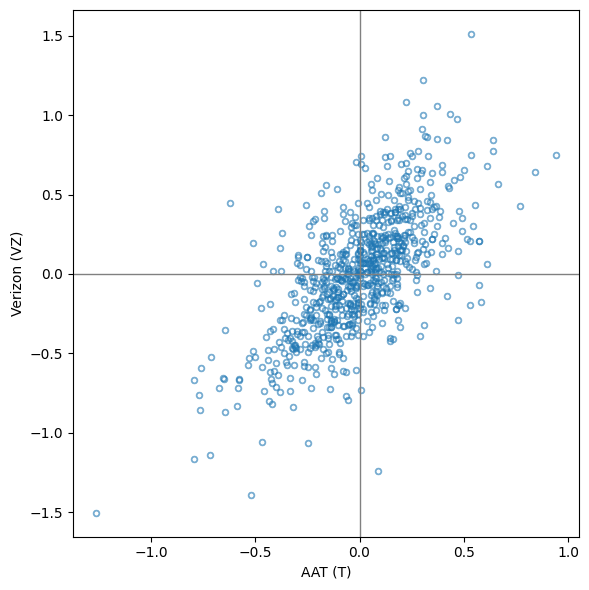

In [46]:
ax = telecom.plot.scatter(x="T",y="VZ",figsize=(6,6),marker="$\u25EF$",alpha=0.5)
ax.set_xlabel("AAT (T)")
ax.set_ylabel("Verizon (VZ)")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)

plt.tight_layout()
plt.show()

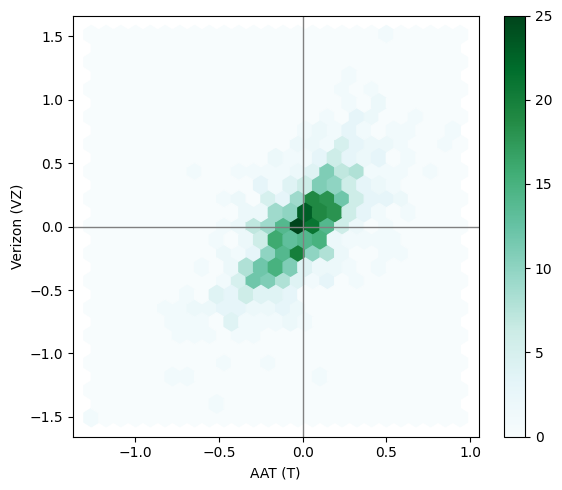

In [47]:
ax = telecom.plot.hexbin(x="T",y="VZ",figsize=(6,5),gridsize=25,sharex=False)
ax.set_xlabel("AAT (T)")
ax.set_ylabel("Verizon (VZ)")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)


plt.tight_layout()
plt.show()

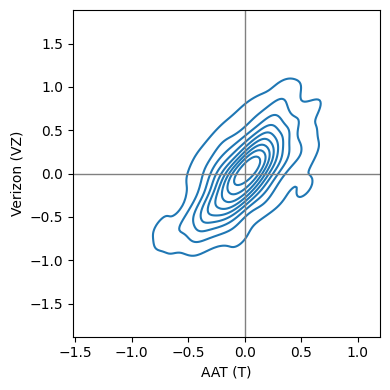

In [48]:
import seaborn as sns

fig , ax = plt.subplots(figsize=(4,4))
sns.kdeplot(data=telecom,x="T",y="VZ",ax=ax)
ax.set_xlabel("AAT (T)")
ax.set_ylabel("Verizon (VZ)")
ax.axhline(0, color="grey", lw=1)
ax.axvline(0, color="grey", lw=1)


plt.tight_layout()
plt.show()

Nun analysieren wir die Tagesrenditen der wichtigsten börsengehandelten **Indexfonds (ETFs)**:  

In [49]:
etfSym = sp500_sym[sp500_sym["sector"] == "etf"]["symbol"]
etfSym

315    XLI
316    QQQ
317    SPY
318    DIA
319    GLD
320    VXX
321    USO
322    IWM
323    XLE
324    XLY
325    XLU
326    XLB
327    XTL
328    XLV
329    XLP
330    XLF
331    XLK
Name: symbol, dtype: object

In [50]:
etfs = sp500_px.loc[sp500_px.index >= "2012-07-01",etfSym]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
Unnamed: 0,,,,,,,,,,,,,,,,,
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


In [51]:
etfs.corr()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
XLI,1.000000,0.785865,0.888865,0.869680,0.056554,-0.468196,0.236881,0.782380,0.650054,0.798080,0.380809,0.784144,0.374000,0.663022,0.600424,0.787340,0.777773
QQQ,0.785865,1.000000,0.908995,0.834440,0.043553,-0.470555,0.199492,0.810158,0.560044,0.839701,0.346667,0.713463,0.421790,0.775392,0.614806,0.752771,0.945126
SPY,0.888865,0.908995,1.000000,0.953726,0.078722,-0.547074,0.272069,0.833937,0.713300,0.887028,0.481928,0.826053,0.406181,0.811269,0.744466,0.883616,0.886588
DIA,0.869680,0.834440,0.953726,1.000000,0.051523,-0.511327,0.256793,0.758012,0.658311,0.847043,0.463364,0.787415,0.383928,0.771044,0.753725,0.860556,0.842757
GLD,0.056554,0.043553,0.078722,0.051523,1.000000,-0.107488,0.216563,0.070110,0.188625,0.017467,0.121611,0.184366,-0.042233,-0.010200,0.033047,0.043039,0.053022
VXX,-0.468196,-0.470555,-0.547074,-0.511327,-0.107488,1.000000,-0.195397,-0.448942,-0.448474,-0.474756,-0.260395,-0.470890,-0.205661,-0.380925,-0.416913,-0.514365,-0.477258
USO,0.236881,0.199492,0.272069,0.256793,0.216563,-0.195397,1.000000,0.249799,0.525943,0.183275,0.113182,0.324166,0.078796,0.119500,0.116857,0.221760,0.225962
IWM,0.782380,0.810158,0.833937,0.758012,0.070110,-0.448942,0.249799,1.000000,0.586991,0.779750,0.325003,0.701533,0.387274,0.664288,0.537065,0.756282,0.760438
XLE,0.650054,0.560044,0.713300,0.658311,0.188625,-0.448474,0.525943,0.586991,1.000000,0.578956,0.337942,0.689778,0.260463,0.454457,0.413486,0.599129,0.559324
XLY,0.798080,0.839701,0.887028,0.847043,0.017467,-0.474756,0.183275,0.779750,0.578956,1.000000,0.366827,0.721232,0.370299,0.702860,0.663055,0.782053,0.772189


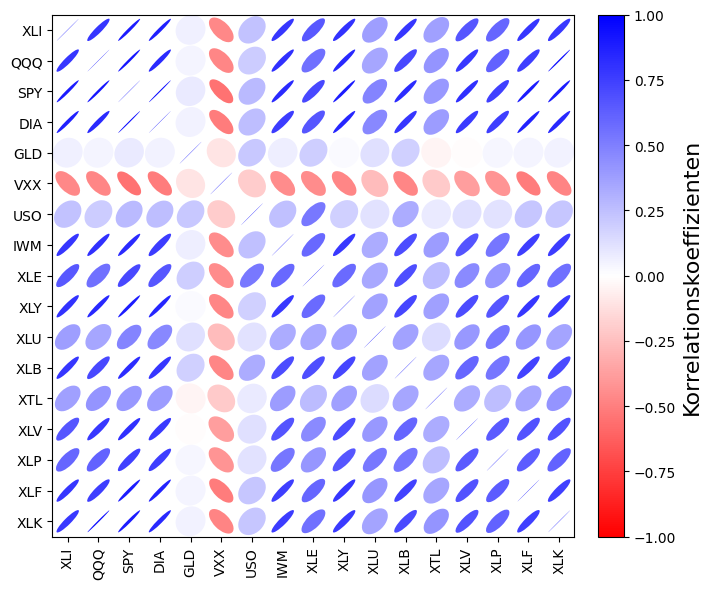

In [52]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize
import numpy as np
import matplotlib.pyplot as plt

M = np.array(etfs.corr())

fig, ax = plt.subplots(1,1,figsize=(7,6),subplot_kw={"aspect":"equal"})
ax.set_xlim(-0.5, M.shape[1]-0.5)
ax.set_ylim(-0.5, M.shape[0]-0.5)
ax.invert_yaxis()
#Koordinatenpaare für die Ellipsen erstellen
xy = np.array([[i,j] for j in range(M.shape[0]) for i in range(M.shape[1])])
#Ellipsen Abmessungen
w = np.ones_like(M).ravel() + 0.01 # ravel : entwirren -> in einen 1-dim array
h = 1 - np.abs(M).ravel() -0.01
a = 45 * np.sign(M).ravel()
#Ellipsen erstellen
ec = EllipseCollection(widths = w,
                      heights = h,
                      angles = a,
                      units = "x",
                      offsets = xy,
                      norm=Normalize(vmin=-1,vmax=1),
                      transOffset = ax.transData,
                      array = M.ravel(),
                      cmap="bwr_r")

ax.add_collection(ec)
ax.set_xticks(np.arange(M.shape[1]))
ax.set_xticklabels(etfs,rotation=90)
ax.set_yticks(np.arange(M.shape[1]))
ax.set_yticklabels(etfs)


fig.colorbar(ec,ax=ax,orientation="vertical",
             fraction=0.046,pad=0.04).set_label(
             label="Korrelationskoeffizienten",size=16)
plt.tight_layout()
plt.show()

### <span style="color:rgb(160,0,86)">Aufgabe 1</span>
Machen Sie eine **Zusammenhangsanalyse** für die Daten der Hünereier im Datensatz *Palette.sav*.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_spss("Daten/Palette.sav")
df.set_index("Nummer", inplace=True)
df.head()

,Breite,Höhe,Gewicht
Nummer,,,
10001.0,44.7,58.5,66.5
10002.0,44.0,60.1,65.5
10003.0,44.4,57.2,63.0
10004.0,43.3,59.2,64.5
10005.0,45.3,57.6,65.5


# Breite - Höhe

           Breite      Höhe   Gewicht
Breite   1.000000  0.446364  0.857398
Höhe     0.446364  1.000000  0.761572
Gewicht  0.857398  0.761572  1.000000


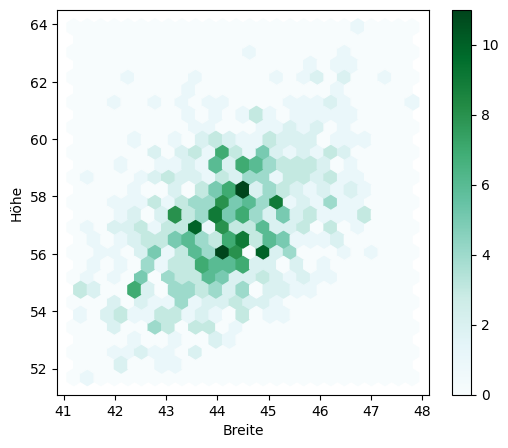

In [16]:
ax = df.plot.hexbin(x="Breite",y="Höhe",figsize=(6,5),gridsize=25,sharex=False)

print(df.corr())

# Breite Gewicht

           Breite      Höhe   Gewicht
Breite   1.000000  0.446364  0.857398
Höhe     0.446364  1.000000  0.761572
Gewicht  0.857398  0.761572  1.000000


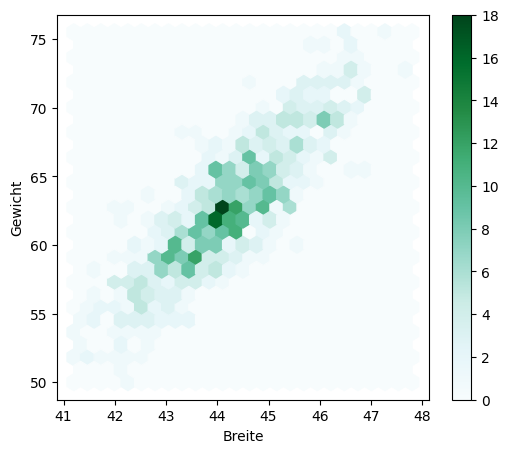

In [17]:
ax = df.plot.hexbin(x="Breite",y="Gewicht",figsize=(6,5),gridsize=25,sharex=False)

print(df.corr())

# Höhe - Gewicht

           Breite      Höhe   Gewicht
Breite   1.000000  0.446364  0.857398
Höhe     0.446364  1.000000  0.761572
Gewicht  0.857398  0.761572  1.000000


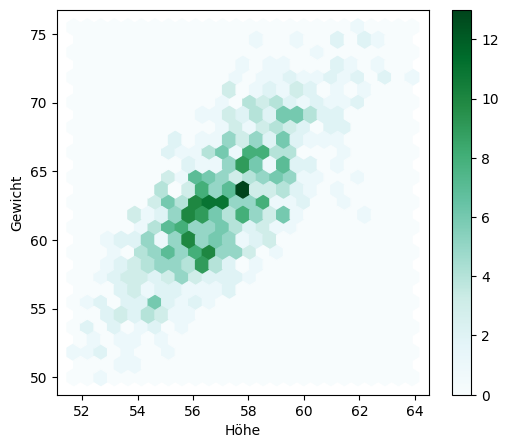

In [19]:
ax = df.plot.hexbin(x="Höhe",y="Gewicht",figsize=(6,5),gridsize=25,sharex=False)

print(df.corr())

### <span style="color:rgb(160,0,86)">Aufgabe 2</span>

Machen Sie eine **Zusammenhangsanalyse** für die Daten der *palmerpenguins* (siehe Serie 03).

In [ ]:
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()


### <span style="color:rgb(160,0,86)">Aufgabe 3</span>

Ergänzen Sie die **Zusammenhangsanalyse** im Datensatz *2021_Personalerhebung.csv* für die anderen Merkmale.

![HSLU](Bilder/LogoHSLU.png)